Coordenograma Simples

Creator: Prof. Pedro Henrique Aquino Barra (pedrobarra@ufu.br)

Version: 1.0.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def iec_curve(time_multiplier, pickup_current, max_current):
    """Calcula a curva IEC Normalmente Inversa"""
    k, alpha = 0.14, 0.02
    current = np.logspace(np.log10(pickup_current * 1.01), np.log10(max_current), 1000)
    trip_time = (k * time_multiplier) / ((current / pickup_current) ** alpha - 1)
    return current, trip_time

def plot_coordenograma(relays, title, save=False):
    """Plota o coordenograma para os relés especificados e salva a imagem se necessário"""
    plt.figure(figsize=(10, 6), dpi=300 if save else 100)
    colors = ['b', 'r']
    
    for i, (name, params) in enumerate(relays.items()):
        primary_ip = params['Ip'] * params['RTC']
        primary_i50 = params['I50'] * params['RTC']
        current, trip_time = iec_curve(params['TMS'], primary_ip, primary_i50)
        plt.loglog(current, trip_time, color=colors[i], label=f"{name} 51 (Ip={primary_ip}A, TMS={params['TMS']})")
        plt.axvline(primary_i50, color=colors[i], linestyle='--', alpha=0.7, label=f"{name} 50 ({primary_i50}A)")
    
    plt.xlabel("Corrente Primária (A)")
    plt.ylabel("Tempo de Atuação (s)")
    plt.title(title)
    plt.grid(which="both", linestyle="--", alpha=0.6)
    plt.legend()
    
    if save:
        filename = title.replace(" ", "_").lower() + ".png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Gráfico salvo como: {filename}")
    
    plt.show()

# Parâmetros dos relés para fase
relays_fase = {
    "Relé R1": {"Ip": 5.1, "TMS": 0.3382, "I50": 67, "RTC": 100},
    "Relé R2": {"Ip": 2.4, "TMS": 0.200, "I50": 64, "RTC": 80}
}

# Parâmetros dos relés para neutro
relays_neutro = {
    "Relé R1": {"Ip": 0.4, "TMS": 0.5151, "I50": 40, "RTC": 100},
    "Relé R2": {"Ip": 0.2, "TMS": 0.200, "I50": 39, "RTC": 80}
}

# Gerar e salvar gráficos
plot_coordenograma(relays_fase, "Coordenograma de Fase", save=True)
plot_coordenograma(relays_neutro, "Coordenograma de Neutro", save=True)


Gráfico salvo como: coordenograma_de_fase_(i4200).png


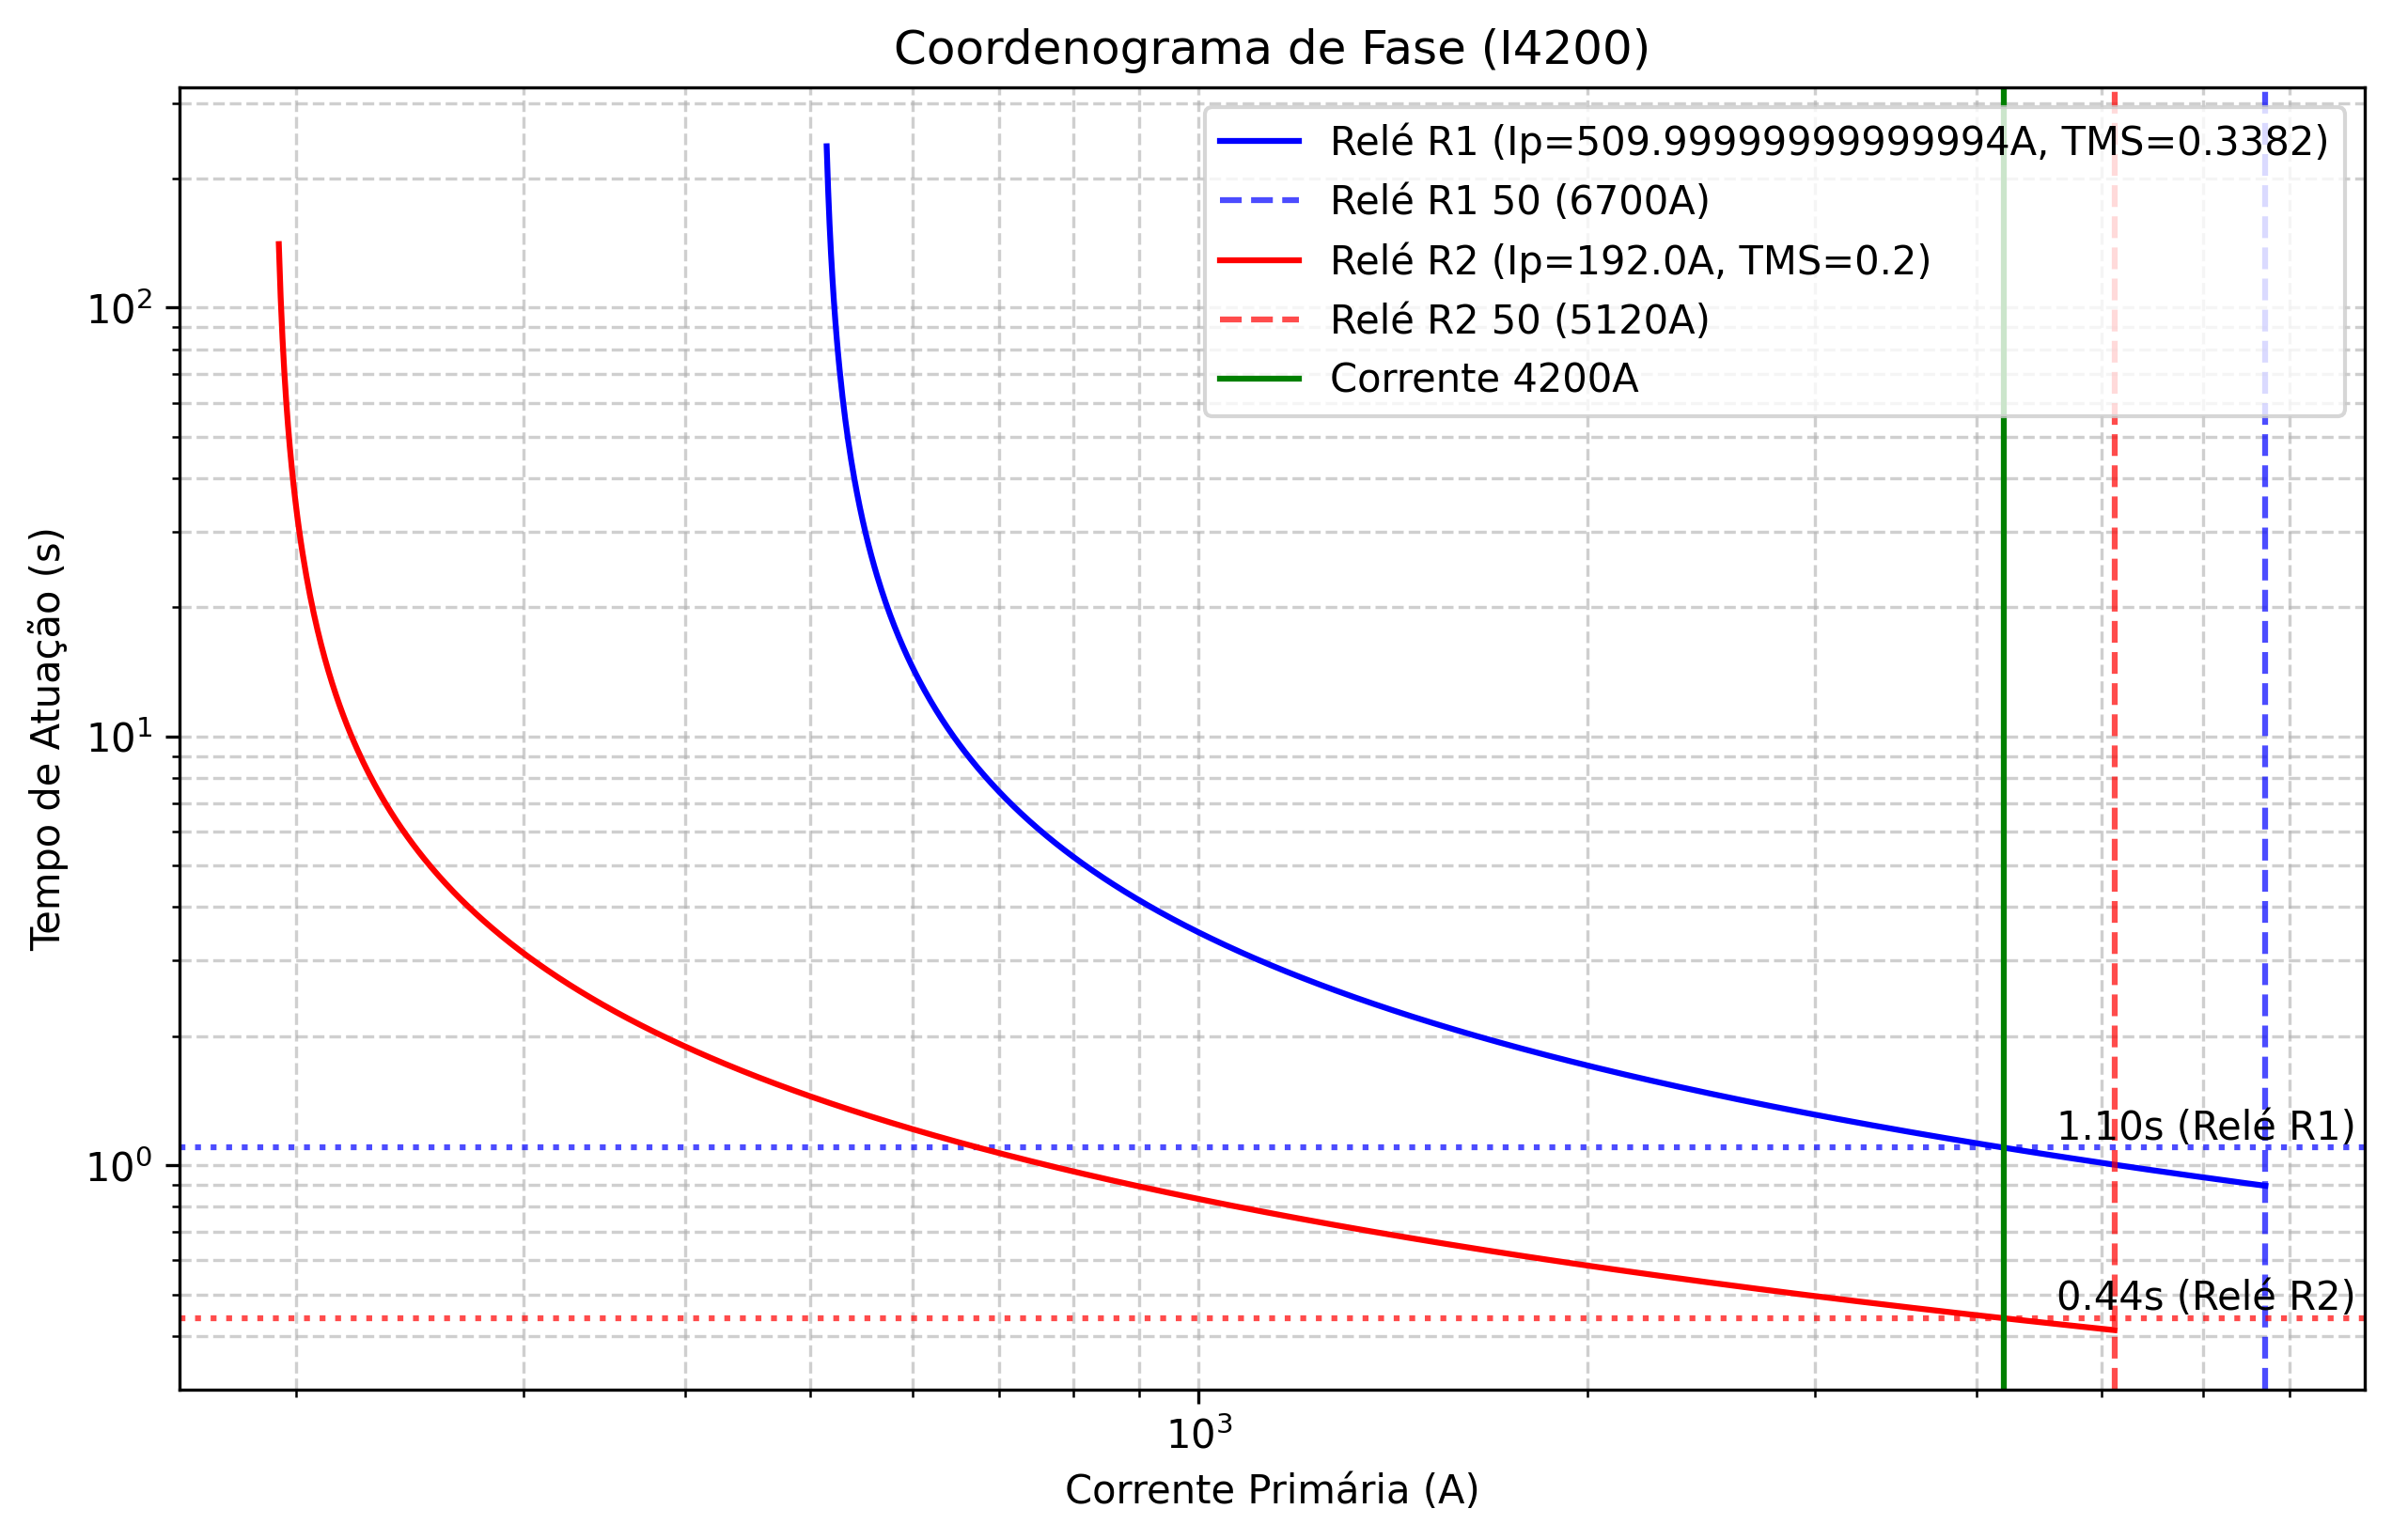

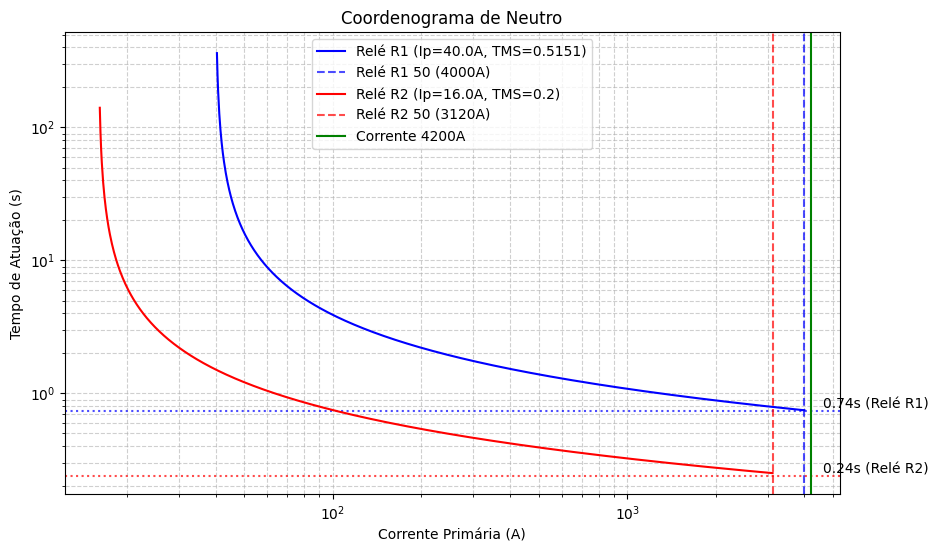

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def iec_curve(time_multiplier, pickup_current, max_current):
    """Calcula a curva IEC Normalmente Inversa"""
    k, alpha = 0.14, 0.02
    current = np.logspace(np.log10(pickup_current * 1.01), np.log10(max_current), 1000)
    trip_time = (k * time_multiplier) / ((current / pickup_current) ** alpha - 1)
    return current, trip_time

def plot_coordenograma(relays, title, highlight_current=None, save=False):
    """Plota o coordenograma para os relés especificados e salva a imagem se necessário"""
    plt.figure(figsize=(10, 6), dpi=300 if save else 100)
    colors = ['b', 'r']
    times_at_highlight = {}
    
    for i, (name, params) in enumerate(relays.items()):
        primary_ip = params['Ip'] * params['RTC']
        primary_i50 = params['I50'] * params['RTC']
        current, trip_time = iec_curve(params['TMS'], primary_ip, primary_i50)
        plt.loglog(current, trip_time, color=colors[i], label=f"{name} (Ip={primary_ip}A, TMS={params['TMS']})")
        plt.axvline(primary_i50, color=colors[i], linestyle='--', alpha=0.7, label=f"{name} 50 ({primary_i50}A)")
        
        if highlight_current:
            time_at_highlight = (0.14 * params['TMS']) / ((highlight_current / primary_ip) ** 0.02 - 1)
            times_at_highlight[name] = time_at_highlight
            plt.axhline(time_at_highlight, color=colors[i], linestyle=':', alpha=0.7)
    
    if highlight_current:
        plt.axvline(highlight_current, color='g', linestyle='-', linewidth=1.5, label=f'Corrente {highlight_current}A')
        for name, time in times_at_highlight.items():
            plt.text(highlight_current * 1.1, time, f"{time:.2f}s ({name})", fontsize=10, verticalalignment='bottom')
    
    plt.xlabel("Corrente Primária (A)")
    plt.ylabel("Tempo de Atuação (s)")
    plt.title(title)
    plt.grid(which="both", linestyle="--", alpha=0.6)
    plt.legend()
    
    if save:
        filename = title.replace(" ", "_").lower() + ".png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Gráfico salvo como: {filename}")
    
    plt.show()

# Parâmetros dos relés para fase
relays_fase = {
    "Relé R1": {"Ip": 5.1, "TMS": 0.3382, "I50": 67, "RTC": 100},
    "Relé R2": {"Ip": 2.4, "TMS": 0.200, "I50": 64, "RTC": 80}
}

# Parâmetros dos relés para neutro
relays_neutro = {
    "Relé R1": {"Ip": 0.4, "TMS": 0.5151, "I50": 40, "RTC": 100},
    "Relé R2": {"Ip": 0.2, "TMS": 0.200, "I50": 39, "RTC": 80}
}

# Gerar e salvar gráficos
plot_coordenograma(relays_fase, "Coordenograma de Fase (I4200)", highlight_current=4200, save=True)
plot_coordenograma(relays_neutro, "Coordenograma de Neutro", highlight_current=4200, save=False)
